# Table of Contents

#### 01 Importing Data and Libraries

#### 02 Data Wrangling

#### 03 Time Series Analysis: Decomposition

#### 04 Testing for Stationarity

#### 05 Autocorrelation Check

#### 06 Stantionarizing the Data

#### 07 Exports

# 01 Importing Data and Libraries

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
plt.style.use('fivethirtyeight')
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
path = r'/Users/Dena/Murder Data Analysis'

In [47]:
# import the clean UCR data
df_ucr = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ucr_clean.pkl'))

In [48]:
# check the shape
df_ucr.shape

(166225, 10)

In [49]:
# check the output
df_ucr.head()

,ORI,name,year,murders,cleared,state,county,agency,cold_cases,region
0,AK00101,ANCHORAGE,1965,7,6,Alaska,"Anchorage, AK",Anchorage,1,West
1,AK00101,ANCHORAGE,1966,18,16,Alaska,"Anchorage, AK",Anchorage,2,West
2,AK00101,ANCHORAGE,1967,1,1,Alaska,"Anchorage, AK",Anchorage,0,West
3,AK00101,ANCHORAGE,1968,7,5,Alaska,"Anchorage, AK",Anchorage,2,West
4,AK00101,ANCHORAGE,1969,7,4,Alaska,"Anchorage, AK",Anchorage,3,West


# 02 Data Wrangling

Break the data down into year and murders.

In [50]:
# get rid of unecessary columns
df_ucr.drop(columns=['ORI', 'name', 'cleared', 'state', 'county', 'agency', 'cold_cases', 'region'], inplace=True)

In [51]:
# check the output
df_ucr.head()

,year,murders
0,1965,7
1,1966,18
2,1967,1
3,1968,7
4,1969,7


In [52]:
# remove years before 1980
df_ucr = df_ucr.loc[(df_ucr['year'] >= '1980')]

In [53]:
# check the output
df_ucr.head()

,year,murders
15,1980,15
16,1981,18
17,1982,22
18,1983,16
19,1984,16


In [54]:
df_ucr.dtypes

year       object
murders     int64
dtype: object

In [55]:
# Set the "year" column as the index and make the format datetime

from datetime import datetime

df_ucr['datetime'] = pd.to_datetime(df_ucr['year'])
df_ucr = df_ucr.set_index('datetime')
df_ucr.drop(['year'], axis=1, inplace=True)
df_ucr.head()

,murders
datetime,
1980-01-01,15
1981-01-01,18
1982-01-01,22
1983-01-01,16
1984-01-01,16


Aggregate the murders for each year.

In [ ]:
df_ucr = df_ucr.groupby('datetime')[['murders']].sum()

In [59]:
# check the output
df_ucr.head()

,murders
datetime,
1980-01-01,22518
1981-01-01,21812
1982-01-01,20471
1983-01-01,18840
1984-01-01,17572


Text(0, 0.5, 'Number of Homicides')

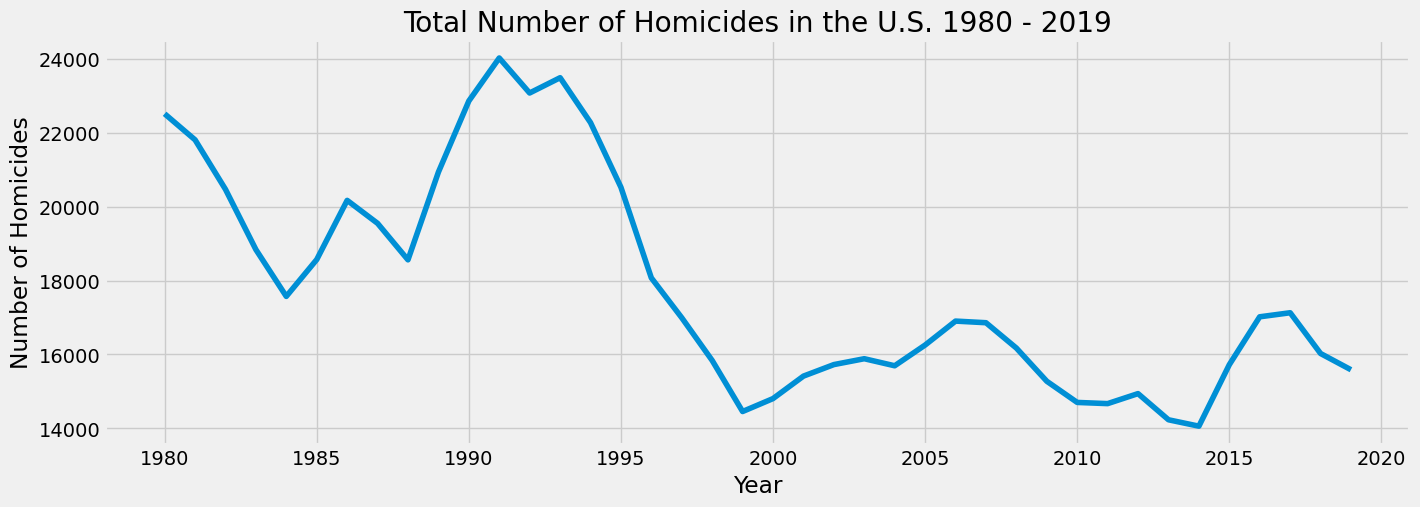

In [76]:
# Plot the new data set

murder_trend = plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_ucr)
plt.title('Total Number of Homicides in the U.S. 1980 - 2019')
plt.xlabel('Year')
plt.ylabel('Number of Homicides')

In [60]:
# check for missing values
df_ucr.isnull().sum() 

murders    0
dtype: int64

In [61]:
# check for duplicates
dups = df_ucr.duplicated()
dups.sum()

0

# 03 Time Series Analysis: Decomposition

In [62]:
# decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(df_ucr, model='additive')

In [64]:
# define a fixed size for all special charts
rcParams['figure.figsize'] = 18, 7

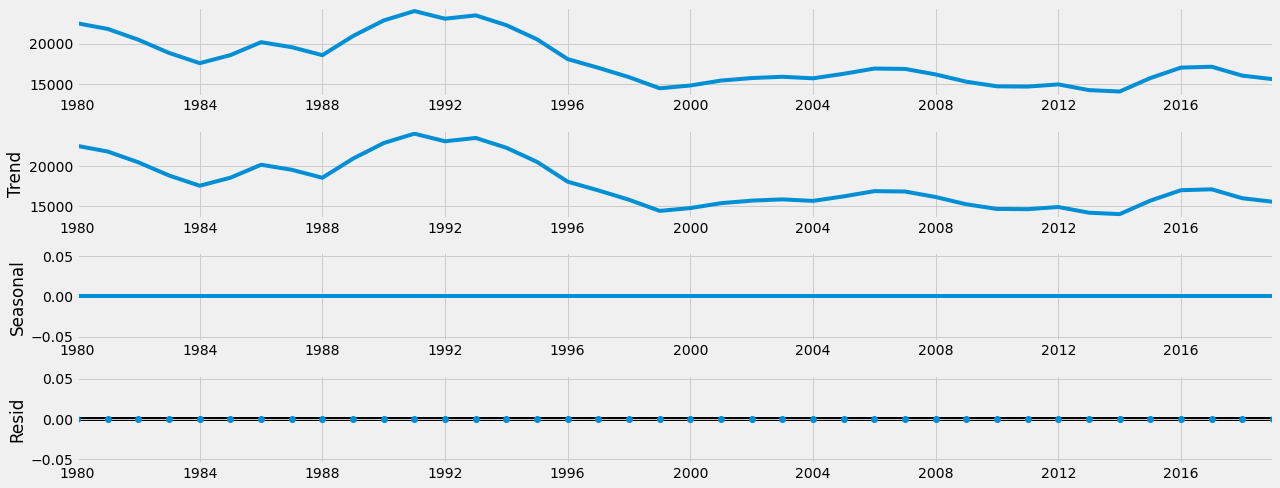

In [65]:
# plot the separate components
decomposition.plot()
plt.show()

The trend line indicates that there is no noise in the data, since it is the same as the level (original curve). The seasonal line is flat, showing us that there is no seasonality. Finally, the residual (noise) curve is flat and shows us that there is no unexplained noise. There appears to be a slight downward trend in the data. This data may or may not be stationary.

# 04 Testing for Stationarity

Null hypothesis: There is a unit root. (The data is stationary.)
<br>
Alternate hypothesis: There is no unit root. (The data is not stationary.)

In [68]:
def dickey_fuller(timeseries):
    
    # perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# apply the test using the function on the time series
dickey_fuller(df_ucr['murders'])

Dickey-Fuller Stationarity test:
Test Statistic                 -2.155956
p-value                         0.222617
Number of Lags Used             1.000000
Number of Observations Used    38.000000
Critical Value (1%)            -3.615509
Critical Value (5%)            -2.941262
Critical Value (10%)           -2.609200
dtype: float64


Recall: Test statistic smaller than critical value = can reject null hypothesis

Since the test statistic, -2.155956 is not smaller than the 5% critical value,  -2.941262, we cannot reject the null hypothesis. Therefore, there is no statistical proof that this data is not stationary. 

# 05 Autocorrelation Check

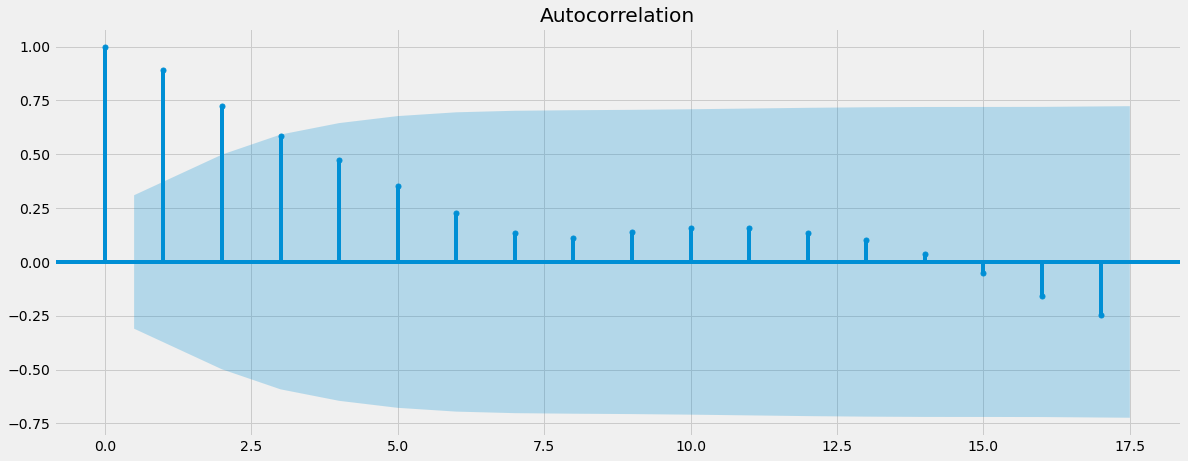

In [71]:
# create out a plot of autocorrelations

plot_acf(df_ucr)
plt.show()

There are only 3 lags that are significantly correlated with each other (the first three), because these lines are outside of the blue confidence interval.

# 06 Stationarizing the Data

There is no proof that the data is not stationary, and  there are a only a few lags that correlate with one another. Therefore, this data does not require any stationarizing. Forecasts can be made with this data as it is. 

I am able to answer one of my research questions: How has the number of homicides fluctuated over the years?
<br>
There was a huge decrease in homicides during the 1990s, and the number of homicides have remained lower ever since. 

# 07 Exports

In [77]:
# export the murder trend line
murder_trend.savefig(os.path.join(path, '04 Analysis','Visualizations', 'murder_trend.png'),bbox_inches = 'tight')